# Robot control Lab 5 - OpenCV and pixel-space basics

Todays lab will focus on basic operations with still images or more commonly single camera frames. We will use OpenCV ([docs](https://docs.opencv.org/4.1.2/index.html)) and during creation of this scenario Google Colab runs OpenCV version 4.1.2, if you have a different version you can change docs version to match.

## Working with Colab

If you are not familiar with Colab, it is a shared Python notebook with a possibility to run a virtual runtime, which is a virtual machine that will allow you to run your code, manage files, etc.

First step would be to copy a Colab notebook so that you can save changes you make and save your code for later. In terms of saving, everything should work just like in Google Docs. If you haven't done that yet, above working area there will be a "Copy to Drive" button, which you should press to be able to save changes. You can use your [UW Google account](https://it.uw.edu.pl/pl/uslugi/UslugiMojaPocztaGmailStudent/).

Go through the whole notebook by expanding subsequent sections. If you are familiar with OpenCV you can probably skip everything until "Detecting markers". And if you are already familiar with markers as well, skip to the "Extra task". In case you are skipping ahead remember to download assets and execute cells with imports.

## Downloading assets



Execute cell below to download assets we will be using today. If you have not launched the runtime yet it will probably launch automatically now.

In [1]:
%cd /content/
!rm -rf lab5_assets
!git clone https://github.com/nomagiclab/lab5_assets.git
%cd lab5_assets


/content
Cloning into 'lab5_assets'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), done.
/content/lab5_assets


## OpenCV basics



First we will import OpenCV and check the version. This scenario is written when the version available in Colab by default is 4.1.2.

In [2]:
import cv2
print(f"OpenCV version is: {cv2.__version__}")

OpenCV version is: 4.1.2


Let's explore how to load an image file and how the variable holding the image looks like.

In [3]:

first_img = cv2.imread("f.png")
first_img

array([[[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [132, 148, 161],
        [122, 135, 149],
        [172, 185, 199]],

       [[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [134, 150, 163],
        [112, 125, 139],
        [159, 172, 186]],

       [[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [147, 163, 176],
        [102, 115, 129],
        [166, 179, 193]],

       ...,

       [[143, 154, 152],
        [137, 148, 146],
        [135, 146, 144],
        ...,
        [221, 236, 239],
        [227, 242, 245],
        [230, 245, 248]],

       [[144, 152, 151],
        [137, 145, 144],
        [137, 145, 144],
        ...,
        [195, 207, 211],
        [192, 204, 208],
        [189, 201, 205]],

       [[137, 145, 144],
        [129, 137, 136],
        [120, 126, 125],
        ...,
        [173, 185, 189],
        [172, 184, 188],
        [173, 185, 189]]

If it looks familiar thats because the underlying type for the image is actually a NumPy array. Let's explore its shape and elements type.

In [4]:
print(f"Shape is: {first_img.shape}")
print(f"Element type is: {first_img.dtype}")

Shape is: (822, 1024, 3)
Element type is: uint8


So here is the first caveat: normally in computer graphics first coordinate is the horizontal axis and the second one is vertical, like so:

![Image coords](https://learn365project.files.wordpress.com/2015/08/computer_coordinates.png)

But because Python's API of OpenCV uses NumPy, the image is treated as a matrix, so x and y are swapped, because that's how we usually index matrices. In this case the shape of `(822, 1024, 3)` will actually mean 822 rows, 1024 columns, so the image resolution will be 1024x822. What about that 3? This designates the number of channels, most often this means RGB channels (to learn more check [here](https://learnopencv.com/color-spaces-in-opencv-cpp-python/)). 

Last thing here: dtype of uint8 means for each pixel for each channel we have a byte (8-bit value, 0-255 range).

Oh and when talking about image coordinates you will sometimes see that letters (u, v) are used instead of (x, y)

Now we are ready to preview the image. Normally when working locally we would use `cv2.imshow` and `cv2.waitKey` functions, but here in the Colab notebook we will use a `cv2_imshow` function provided by Colab.

In [5]:
# Normally we would do:
# cv2.imshow("window", first_img)
# cv2.waitKey(-1)

# But in Colab we need to use:
from google.colab.patches import cv2_imshow

#cv2_imshow(first_img)

What a nice picture!


## Resizing



Let's say we want to make it smaller. Let's first visit docs and find `resize` function. Thats our first function today, so [here](https://docs.opencv.org/4.1.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) is a little hint. Notice that the documentation is primarily for C++, but with every function you should be able to spot Python's API. So we have to pass `src` and `dsize`. Notice also that Python version of the function returns output image both as return value of the function and as the third parameter. Let's resize the image so that it has 300x300 px.

In [6]:
first_img_small_square = cv2.resize(first_img, (300,300))
#cv2_imshow(first_img_small_square)


Now it's your turn! Try to resize the image as we did above, but this time we want height to be 300, but width should be calculated to keep the original aspect ratio.

In [7]:
dsize = (300, 300) # TODO: modify this line
ratio = first_img.shape[0]/300
dsize = (int(first_img.shape[1] / ratio), 300)
first_img_small = cv2.resize(first_img, dsize)
#cv2_imshow(first_img_small)

As you probably noticed there is a difference in that `shape[0]` is y (vertical, height) and `shape[1]` is x (horizontal, width) because this is numpy interface. When we pass something to any OpenCV function such as `dsize` tuple here it has normal order in which first coordinate is horizontal one.



## Cropping



We can also crop the image (cut some rectangular section). In Python, since OpenCV uses NumPy we actually do that using NumPy matrix operators (slicing). Let's say we want to cut a vertical rectangle from the middle of the original image.

In [8]:
# "tl" is often used to designate top-left corner, "br" will be bottom-right
# We will cut a rectangle that starts in the middle of the image and goes 200 px right and 350 px down.

crop_tl_x = first_img.shape[1] // 2
crop_tl_y = first_img.shape[0] // 2
crop_width = 200
crop_height = 350
crop_br_x = crop_tl_x + crop_width
crop_br_y = crop_tl_y + crop_height

first_img_crop_0 = first_img[crop_tl_y:crop_br_y, crop_tl_x:crop_br_x]
# cv2_imshow(first_img_crop_0)

Now your turn: crop a rectangle that starts in (u, v) = (175, 675) and has a vertical dimension 100 and horizontal 200.

In [9]:
# TODO: Crop first_img_crop_1 as instructed above


crop_tl_x = 175
crop_tl_y = 675

crop_width = 200
crop_height = 100

crop_br_x = crop_tl_x + crop_width
crop_br_y = crop_tl_y + crop_height

first_img_crop_1 = first_img[crop_tl_y:crop_br_y, crop_tl_x:crop_br_x]
# cv2_imshow(first_img_crop_1)

## Grayscale conversion



The last thing we will explore about general OpenCV tasks today will be converting an image to grayscale and then binary black and white image. You probably know OpenCV and the docs enough already to find the solution yourself (try google if you cannot find what you want in the docs).

Hint: `cv2.COLOR_BGR2GRAY`

In [10]:
# TODO: Convert first_img (or first_img_small) to grayscale
first_img_grayscale = cv2.cvtColor(first_img_small, cv2.COLOR_RGB2GRAY)
# cv2_imshow(first_img_grayscale)

In [11]:
# TODO: Convert first_img_grayscale to binary and adjust the threshold so that the image looks crisp
_, first_img_binary = cv2.threshold(first_img_grayscale, 180, 255, cv2.THRESH_BINARY)
# cv2_imshow(first_img_binary)

## Detecting markers




Now let's try to do something very useful in robotics! Fiducial markers are specially designed shapes, very often squares with binary pixels that encode only the id of the marker. You can think of them as QR codes, but they are not designed as to carry a lot of information like a QR code, but rather have very distinct edge so we can detect its shape and position on the image.

![Markers](https://github.com/nomagiclab/lab5_assets/raw/master/alot.png)


We will take an image and run a function that will detect markers. We will use "0.png" first. It is always a good idea to preview an image we are working with.

In [12]:
# TODO: load an image named "0.png"
img0 = cv2.imread("0.png")
# cv2_imshow(img0)


There is a lot of different tag families. On our images all tags are from the AprilTag 16h5 family. We will create a dictionary object that will be passed to the detector. Detector is just a function called `detectMarkers`. Below you will find a complete call to the detector. Inspect what are return values (or read in the docs!)

In [13]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
corners, ids, _ = cv2.aruco.detectMarkers(img0, dictionary)
# TODO: inspect what is returned from detectMarkers
print(f'Corners: {corners}, Ids: {ids}')

Corners: [array([[[1230.,  460.],
        [1109.,  448.],
        [1113.,  348.],
        [1229.,  359.]]], dtype=float32)], Ids: [[12]]


You can see how the output looks like for one marker in the image. We get `corners` and `ids` and every detection has 4 corners and corresponding id. As you can see every corner is a pair of (x, y) coordinates. Notice the nesting of lists, you would probably expect one less level of nesting!

First, let's visualize the detections and for now let's use the default function `drawDetectedMarkers`.

Head to the docs and find out how to use it!

In [14]:
# Hint: To not draw over original image we can create a copy
img0_draw = img0.copy()

# TODO: draw markers detected in previous step on the img0_draw
img0_draw = cv2.aruco.drawDetectedMarkers(img0_draw, corners)

# cv2_imshow(img0_draw)

Notice that one corner of the marker is special. This will be the index corner, so that you can detect marker rotation and will always be first on the list of corners. Now your task is to crop the original image (without detections visualized) to focus on the marker. Crop the marker with some margin around all corners.

[1230.0, 1109.0, 1113.0, 1229.0]
[460.0, 448.0, 348.0, 359.0]


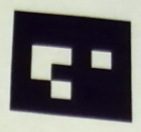

In [15]:
# Hint: below is a list of all x coordinates of our marker's corners
xs = [corner[0] for corner in corners[0][0]]
ys = [corner[1] for corner in corners[0][0]]
print(xs)
print(ys)
# TODO: produce img0_marker_crop so that only the marker is visible (but with some margin around)

crop_tl_x = int(min(xs)) - 10
crop_tl_y = int(min(ys)) - 10

crop_width = max(xs) - min(xs)
crop_height = max(ys) - min(ys)

crop_br_x = int(crop_tl_x + crop_width) + 20
crop_br_y = int(crop_tl_y + crop_height) + 20

img0_marker_crop = img0[crop_tl_y:crop_br_y, crop_tl_x:crop_br_x]
cv2_imshow(img0_marker_crop)


## Drawing markers



Now let's try to write our own `drawMarkers` function! Below is a demo of how to use drawing functions. Write your drawing function that marks sides, corners (different mark for index corner) and displays id.

In [16]:
# Demo of drawing
draw_demo = first_img.copy()

RED = (0, 0, 255)
PINK = (255, 0, 255)

cv2.circle(draw_demo, (100, 200), 30, RED, cv2.FILLED)
cv2.line(draw_demo, (250, 250), (800, 100), PINK, 3)
cv2.putText(draw_demo, "(250, 250)", (250, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, RED, 2)
cv2.putText(draw_demo, "(800, 100)", (800, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, RED, 2)
# cv2_imshow(draw_demo)

array([[[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [132, 148, 161],
        [122, 135, 149],
        [172, 185, 199]],

       [[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [134, 150, 163],
        [112, 125, 139],
        [159, 172, 186]],

       [[245, 193, 153],
        [245, 193, 153],
        [245, 193, 153],
        ...,
        [147, 163, 176],
        [102, 115, 129],
        [166, 179, 193]],

       ...,

       [[143, 154, 152],
        [137, 148, 146],
        [135, 146, 144],
        ...,
        [221, 236, 239],
        [227, 242, 245],
        [230, 245, 248]],

       [[144, 152, 151],
        [137, 145, 144],
        [137, 145, 144],
        ...,
        [195, 207, 211],
        [192, 204, 208],
        [189, 201, 205]],

       [[137, 145, 144],
        [129, 137, 136],
        [120, 126, 125],
        ...,
        [173, 185, 189],
        [172, 184, 188],
        [173, 185, 189]]

In [17]:
# Experiment with colors!
GREEN = (0, 255, 0)
DARK_GREEN = (0, 127, 0)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
VIOLET = (255, 0, 255)
CYAN = (255, 255, 0)
YELLOW = (0, 255, 255)
ORANGE = (0, 100, 255)
BLACK = (0, 0, 0)

def drawMarkers(img, corners, ids):
  if ids is None:
    return
  # TODO: use demo above to put points, lines and text on the image
  for k in range(len(corners)):
    xs = [corner[0] for corner in corners[k][0]]
    ys = [corner[1] for corner in corners[k][0]]
    for i in range(len(xs)):
      if i == len(xs) - 1:
        j = 0
      else:
        j = i + 1
      cv2.line(img, (xs[i], ys[i]), (xs[j], ys[j]), PINK, 3)
      cv2.circle(img, (xs[i], ys[i]), 5, RED, cv2.FILLED)
    cv2.circle(img, (xs[0], ys[0]), 5, YELLOW, cv2.FILLED)
    cv2.putText(img, 'id = ' + str(ids[0][0]), (int(xs[0]) + 10, int(ys[0]) + 10), cv2.FONT_HERSHEY_SIMPLEX, 1, ORANGE, 2)



img0_draw = img0.copy()
drawMarkers(img0_draw, corners, ids)
# cv2_imshow(img0_draw)

Remember how we called `detectMarkers` on 0.png? Now do the same for images 1-6 (writing a function might be a good idea). Draw results using your drawing function!

In [18]:
# TODO: detect, draw and show markers on images 1-6.png

def detect_draw_show(filename):
  img = cv2.imread(filename)
  dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
  corners, ids, _ = cv2.aruco.detectMarkers(img, dictionary)
  img0_draw = img.copy()
  drawMarkers(img0_draw, corners, ids)
  # cv2_imshow(img0_draw)


for i in range(6):
  filename = str(i) + '.png'
  detect_draw_show(filename)

## Extra task



If you finished early or just want a more challanging task here is one more for you. Let's take 7.png and assume that due to it being high resolution running markers detection on whole image will be very slow. Now assume you somehow know that markers will probably be found in two areas of interest. First area is from (700, 450) to (900, 600) and second area has bottom left (!) corner at (1200, 1000) and has height of 600 and width 300. Crop the areas of interest, run markers detection and then return marker ids with coordinates of their index corners on the original image. Call your drawing function exactly once to visualize detections, you will need combined results in full image coordinates.

In [19]:
img7 = cv2.imread("7.png")


# TODO: detect in areas of interest as described above

crop_tl_x = 700
crop_tl_y = 450
crop_br_x = 900
crop_br_y = 600

img7_1 =  img7[crop_tl_y:crop_br_y, crop_tl_x:crop_br_x]
img7_1_draw = img7_1.copy()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
corners, ids, _ = cv2.aruco.detectMarkers(img7_1_draw, dictionary)
drawMarkers(img7_1_draw, corners, ids)
# cv2_imshow(img7_1_draw)

In [20]:

crop_br_x = 1200 + 600
crop_br_y = 1000
crop_tl_x = crop_br_x - 600
crop_tl_y = crop_br_y - 300


img7_2 =  img7[crop_tl_y:crop_br_y, crop_tl_x:crop_br_x]
img7_2_draw = img7_2.copy()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
corners, ids, _ = cv2.aruco.detectMarkers(img7_2_draw, dictionary)
drawMarkers(img7_2_draw, corners, ids)
# cv2_imshow(img7_2_draw)

## Solutions



[Here](https://colab.research.google.com/drive/1KAdxcsEMEBFCqNFB1SyxEjdpU71Rkp5b?usp=sharing) you will find this same notebook, but with solutions.